<a href="https://colab.research.google.com/github/SwethaSrikari/Math/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Math behind scikit-learn PCA.transform() and PCA.inverse_transform()**

In [1]:
import numpy as np
import pandas as pd
import sklearn

Dataset X with 6 samples and 3 features - `6 x 3`

In [2]:
X = np.array([[-1, -1, 4], [-2, -1, 6], [-3, -2, 4], [1, 1, 5], [2, 1, 7], [3, 2, 6]])
X

array([[-1, -1,  4],
       [-2, -1,  6],
       [-3, -2,  4],
       [ 1,  1,  5],
       [ 2,  1,  7],
       [ 3,  2,  6]])

Standardization ``` (x_i - x̄) / σ ``` where x̄ is the mean of the feature and σ is the standard deviation of the feature

In [3]:
# Method 1
print('Mean', X.mean(0))
print('Standard deviation', X.std(0))
X_std = (X - X.mean(0)) / X.std(0) 

Mean [0.         0.         5.33333333]
Standard deviation [2.1602469  1.41421356 1.1055416 ]


In [4]:
# Method 2
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scalar = std_scaler.fit(X)

print('Mean', X_scalar.mean_)
print('Standard deviation', np.sqrt(X_scalar.var_))

Mean [0.         0.         5.33333333]
Standard deviation [2.1602469  1.41421356 1.1055416 ]


## Step 1 - Calculate the covariance matrix of the features
```
1 / (n-1) ∑(x_i - x̄) (y_i - ȳ)
```

In [5]:
# Method 1
def covariance(x, y):
  """
  Calculate covariance between to variables x, y - Cov(x,y)
  """
  x_mean = x.mean()
  y_mean = y.mean()
  n = len(x)
  cov = np.sum((x - x_mean) * (y - y_mean)) / (n-1)
  return cov

def covariance_matrix(data):
  """
  Returns a covariance matrix
  :params data: is a numpy array
  """
  n = data.shape[1]
  cov_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      cov_matrix[i,j] = covariance(data[:, i], data[:, j])

  return cov_matrix

cov_matrix_X = covariance_matrix(X)
cov_matrix_X

array([[5.6       , 3.6       , 1.8       ],
       [3.6       , 2.4       , 1.2       ],
       [1.8       , 1.2       , 1.46666667]])

In [6]:
# Method 2
np.cov(X.T)

array([[5.6       , 3.6       , 1.8       ],
       [3.6       , 2.4       , 1.2       ],
       [1.8       , 1.2       , 1.46666667]])

## Step 2 - Calculate eigen values and eigen vectors for the variance matrix

In [9]:
from numpy import linalg as la

e_values, e_vectors = la.eig(cov_matrix_X)

print('Eigen values of covariance matrix of X', e_values)
print('Eigen vectors of covariance matrix of X', e_vectors)

Eigen values of covariance matrix of X [8.595911   0.05966683 0.81108883]
Eigen vectors of covariance matrix of X [[-0.80189901 -0.53745805 -0.26095368]
 [-0.52216088  0.84271483 -0.13107144]
 [-0.29035494 -0.03115374  0.95641176]]


## Step 3 - Select the prinicipal components based on the ranking of the eigen values. The eigen vector with the highest eigen value is the first principal component - with the maximum variance (captures more info than the rest)

In [10]:
# Creating a feature vector by arranging eigen vectors in descending order of eigen values
order = np.argsort(e_values)[::-1]

In [11]:
feature_vector = e_vectors.T[order,:]
feature_vector = feature_vector.T

Using sklearn PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [13]:
# Gives the eigen values calculated from the covariance matrix of X
pca.explained_variance_

array([8.595911  , 0.81108883, 0.05966683])

In [14]:
# Gives the percentage of variance explained by each principle component
pca.explained_variance_ratio_

array([0.90801877, 0.0856784 , 0.00630283])

In [15]:
# Covariance matrix calculated using n-1
pca.get_covariance()

array([[5.6       , 3.6       , 1.8       ],
       [3.6       , 2.4       , 1.2       ],
       [1.8       , 1.2       , 1.46666667]])

## Step 4 - Recast the data along the principal component axes

```
Transformed dataset = [X - X̄] * feature_vector
```

In [16]:
# Method 1
transformed_data = np.dot(X - X.mean(0), feature_vector)
print(transformed_data)

# Method 2
# np.matmul(X - X.mean(0), feature_vector)

# Method 3
# np.dot(X - pca.mean_, pca.components_.T)

[[ 1.71119981 -0.88319056 -0.26371846]
 [ 1.93238895  1.29058664  0.21143211]
 [ 3.83715871 -0.23021177 -0.03151719]
 [-1.22727492 -0.71082904  0.31564136]
 [-2.6098838   0.94104081 -0.28412417]
 [-3.64358876 -0.40739607  0.05228635]]


In [18]:
# Method 4 - Using PCA
pca.transform(X)

array([[ 1.71119981, -0.88319056, -0.26371846],
       [ 1.93238895,  1.29058664,  0.21143211],
       [ 3.83715871, -0.23021177, -0.03151719],
       [-1.22727492, -0.71082904,  0.31564136],
       [-2.6098838 ,  0.94104081, -0.28412417],
       [-3.64358876, -0.40739607,  0.05228635]])

## Reconstructing original data from prinicipal components

```
X = inv(feature_vector) * transformed_data + X̄
```

In [40]:
# Method 1 - using PCA inverse_transform
pca.inverse_transform(transformed_data)

array([[-1., -1.,  4.],
       [-2., -1.,  6.],
       [-3., -2.,  4.],
       [ 1.,  1.,  5.],
       [ 2.,  1.,  7.],
       [ 3.,  2.,  6.]])

In [41]:
# Method 2
fv_inv = la.inv(feature_vector)

np.dot(transformed_data, feature_vector.T) + X.mean(0)

array([[-1., -1.,  4.],
       [-2., -1.,  6.],
       [-3., -2.,  4.],
       [ 1.,  1.,  5.],
       [ 2.,  1.,  7.],
       [ 3.,  2.,  6.]])

## Test on handwritten digits dataset

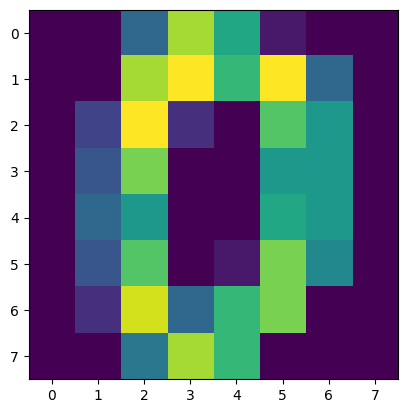

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

data = load_digits()

plt.imshow(data.images[0])

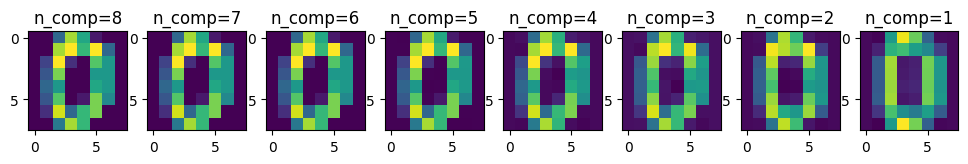

In [74]:
_, axs = plt.subplots(1, 8, figsize=(12, 12))
axs = axs.flatten()
for i, ax in zip(range(8,0,-1), axs):
  pca = PCA(n_components=i)
  transformed_data = pca.fit_transform(data.images[0])
  original = pca.inverse_transform(transformed_data)
  ax.imshow(original)
  ax.title.set_text(f'n_comp={i}')
plt.show()